#Setup

In [16]:
from google.colab import drive

# Import libraries
import pandas as pd
import os

# Mount your Google Drive
drive.mount('/content/drive')

# !pip install librosa soundfile
# !pip install mutagen
# !pip install librosa pydub

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# CASES df

In [17]:
# Step 1: Define the folder path
folder_path = '/content/drive/MyDrive/VUMC_postcleft/PUBLIC SAMPLES/CASES'

# Step 2: List all files in the directory
files = os.listdir(folder_path)

# Step 3: Filter out MP3 files
mp3_files = [file for file in files if file.endswith('.mp3')]

# Step 4: Create a DataFrame with the MP3 files
case_df = pd.DataFrame(mp3_files, columns=['File Name'])

# Step 5: Display the DataFrame
case_df

,File Name
0,ACPA whatever they need.mp3
1,ACPA ted had a dog with white feet-4.mp3
2,Video 6_1 (mom).mp3
3,Facebook (susie sees the scissors).mp3
4,Video 4_5 (but it will help me with the _s_).mp3
...,...
91,Video 5_1 (feet).mp3
92,Video 2_6 (I eat cake and ice cream).mp3
93,Video 1_5 (see the seesaw).mp3
94,Video 6_2 (Popeye).mp3


# Feature Extraction

Utilize Fast Fourier Transformation (FFT) to view audio waves in three dimensions: Amplitude, Frequency, and Time

Visualize Audio Wave: ACPA playing in the snow is fun-5.mp3


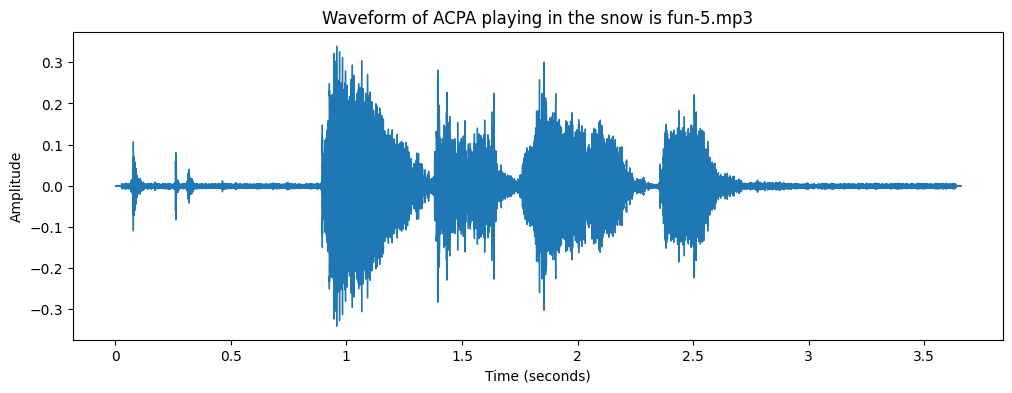

FFT Plot: ACPA playing in the snow is fun-5.mp3


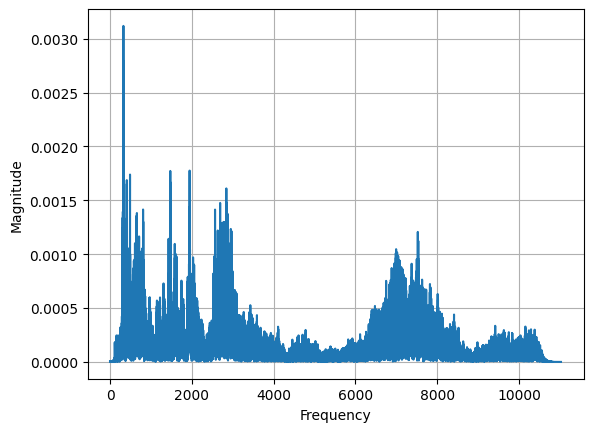

In [18]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio
import numpy as np

# Define the folder path
folder_path = '/content/drive/MyDrive/VUMC_postcleft/PUBLIC SAMPLES/CASES'

# List all files in the directory
files = os.listdir(folder_path)

# Filter out MP3 files
mp3_files = [file for file in files if file.endswith('.mp3')]

# Define a function to visualize audio waveform with descriptions
def visualize_audio_waveform(file_name):
    file_path = os.path.join(folder_path, file_name)
    print(f"Visualize Audio Wave: {file_name}")

    # Load the audio file
    audio, sample_rate = librosa.load(file_path)

    # Plot the waveform
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(audio, sr=sample_rate)
    plt.title(f'Waveform of {file_name}')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.show()

from scipy.fft import fft
# Define an FFT to obtain the frequency and magnitude of a given wave
def fft_plot(file_name):
    file_path = os.path.join(folder_path, file_name)
    print(f"FFT Plot: {file_name}")

    # Load the audio file
    audio, sample_rate = librosa.load(file_path)

    n = len(audio)
    T = 1/sample_rate
    yf=fft(audio)
    xf=np.linspace(0.0, 1.0/(2.0*T), int(n/2))
    fig,ax = plt.subplots()
    ax.plot(xf,2.0/n*np.abs(yf[:n//2]))
    plt.grid()
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")
    return plt.show()

# Example: Visualize the waveform of a specific file
visualize_audio_waveform(mp3_files[90])  # Replace 90 with the index of the file you want to visualize
fft_plot(mp3_files[90])


### Spectrogram

A **spectrogram** is a detailed view of audio, able to represent time, frequency, and amplitude all on one graph. A spectrogram can visually reveal broadband, electrical, or intermittent noise in audio, and can allow you to easily isolate those audio problems by sight.

In [19]:
import os
import librosa
import librosa.display
import librosa.feature
import matplotlib.pyplot as plt
from IPython.display import Audio
import numpy as np

# Define method to create original spectrogram, mel spectrogram, and chroma
# features plot
def spectrogram_display(file_name):
  D = librosa.stft(y) # STFT of y
  S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

  M = librosa.feature.melspectrogram(y=y, sr=sr)
  M_db = librosa.power_to_db(M, ref=np.max)

  chroma = librosa.feature.chroma_cqt(y=y, sr=sr)

  # Construct a subplot grid with 3 rows and 1 column, sharing the x-axis)
  fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True)

  # On the first subplot, show the original spectrogram
  img1 = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax[0])
  ax[0].set(title='STFT (log scale)')

  # On the second subplot, show the mel spectrogram
  img2 = librosa.display.specshow(M_db, x_axis='time', y_axis='mel', ax=ax[1])
  ax[1].set(title='Mel')

  # On the third subplot, show the chroma features
  img3 = librosa.display.specshow(chroma, x_axis='time', y_axis='chroma',
                                  key='Eb:maj', ax=ax[2])
  ax[2].set(title='Chroma')

  # To eliminate redundant axis labels, we'll use "label_outer" on all subplots:
  for ax_i in ax:
      ax_i.label_outer()

  # And we can share colorbars:
  fig.colorbar(img1, ax=[ax[0], ax[1]])

  # Or have individual colorbars:
  fig.colorbar(img3, ax=[ax[2]])

  # We can then even do fancy things like zoom into a particular time and frequency
  # region.  Since the axes are shared, this will apply to all three subplots at once.
  ax[0].set(xlim=[1, 3])  # Zoom to seconds 1-3


# old code
  # D = librosa.stft(y) # STFT of y
  # S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

  # fig, ax = plt.subplots()
  # img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
  # ax.set(title='Spectrogram')
  # fig.colorbar(img, ax=ax, format="%+2.f dB")

# Examples - CASES Data

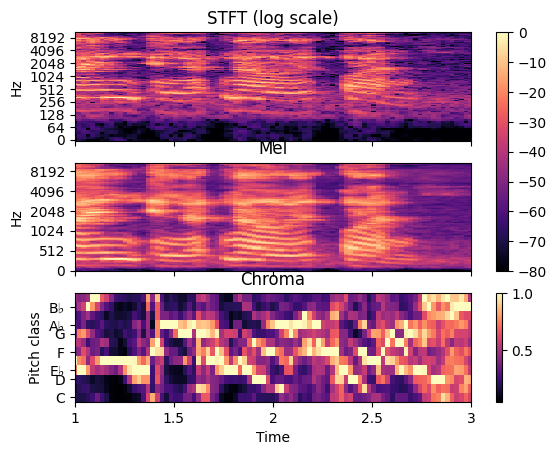

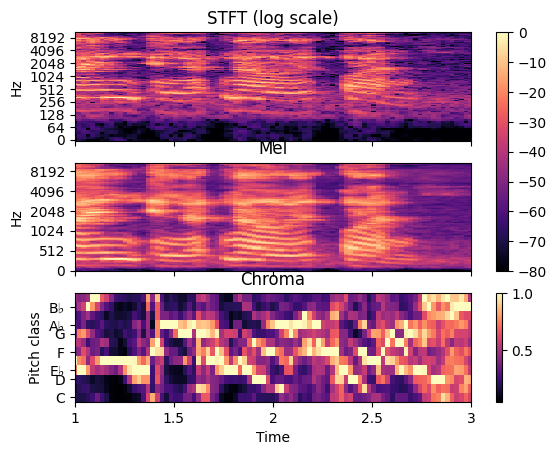

In [20]:
import os
import librosa
import librosa.display
import librosa.feature
import matplotlib.pyplot as plt
from IPython.display import Audio
import numpy as np

# Define the folder path
folder_path = '/content/drive/MyDrive/VUMC_postcleft/PUBLIC SAMPLES/CASES'

# List all files in the directory
files = os.listdir(folder_path)

# Filter out MP3 files
mp3_files = [file for file in files if file.endswith('.mp3')]

audio_path = os.path.join(folder_path, mp3_files[90])
y, sr = librosa.load(audio_path)

# Example: Visualize the waveform of a specific file
spectrogram_display(mp3_files[40])
spectrogram_display(mp3_files[10])

# Examples - CONTROL data

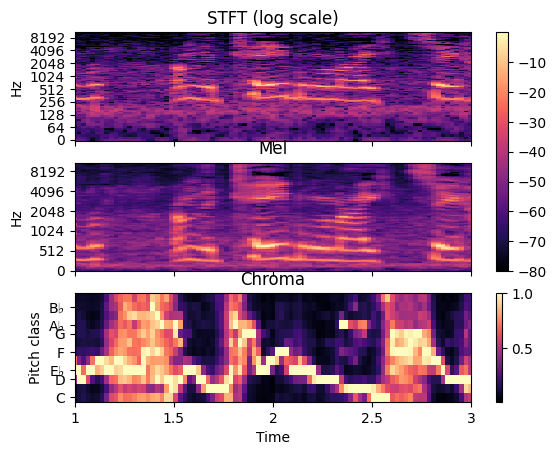

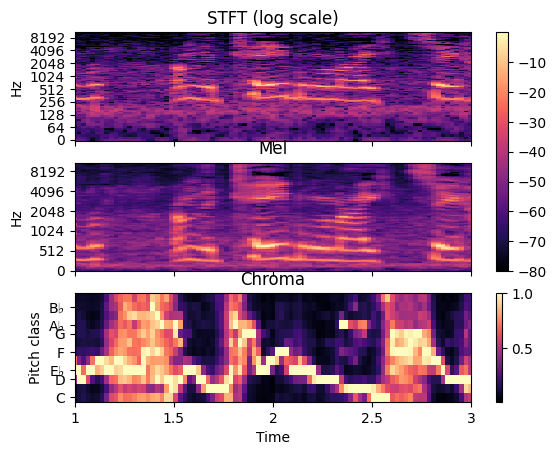

In [22]:
import os
import librosa
import librosa.display
import librosa.feature
import matplotlib.pyplot as plt
from IPython.display import Audio
import numpy as np

# Define the folder path
folder_path = '/content/drive/MyDrive/VUMC_postcleft/PUBLIC SAMPLES/CONTROLS'

# List all files in the directory
files = os.listdir(folder_path)

# Filter out MP3 files
mp3_files = [file for file in files if file.endswith('.mp3')]

audio_path = os.path.join(folder_path, mp3_files[87])
y, sr = librosa.load(audio_path)

# Example: Visualize the waveform of a specific file
spectrogram_display(mp3_files[40])
spectrogram_display(mp3_files[10])